In [1]:
import sys, os, time
import copy
import data, data.gene_datasets
import sklearn, sklearn.model_selection, sklearn.metrics, sklearn.linear_model, sklearn.neural_network, sklearn.tree
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
g = """CEBPD
IL5
PABPC3
PSMB10
RPL13
RPL4
RPL5
RPS10
RPS3
S100A8
S100A9
TOP1"""

In [3]:
plot_gene = "S100A8"
plot_gene = "IFITM3"
plot_gene = "CEBPD"
plot_gene = "PCCB"
# plot_gene = "RPS10"
#plot_gene = "RPL5"
plot_gene = "S100A8"

In [4]:
filename = "results_S100A8.pkl"

In [5]:
import pickle
results = pickle.load(open(filename, "r"))

In [6]:
#pickle.dump(results, open("results-temp.pkl", "wb"))

In [7]:
#results["df"] = results["df"].replace("wRPL5_CGN_3_layer_64_channel_emb_32_dropout", "CGN_3_layer_64_channel_emb_32_dropout")

In [8]:
#pickle.dump(results, open("results-temp.pkl", "wb"))

In [9]:
import pickle
#pickle.dump(results, open("results-temp.pkl", "wb"))

In [10]:
#results = pickle.load(open("exp-results/results-S100A8.pkl", "r"))

In [11]:
# results["df"]

In [12]:
#q = results["df"][(results["df"].model == "CGN_2_layer_512_channel_emb_512_dropout")]
#q

In [13]:
#results["df"] = results["df"].drop(q.index)

In [14]:
#results["df"].gene_name.unique()

In [15]:
# grouped = results["df"][results["df"].gene_name=="S100A8"].groupby(['gene_name', 'model','train_size','num_genes'])['auc'].agg(['mean','std', 'count'])
# grouped

In [16]:
#results["df"].groupby(['gene_name', 'model','num_genes'])['auc'].mean().groupby(["model"]).plot(legend=True, sharex=True);

In [17]:
#results["df"][(results["df"].gene_name==plot_gene)]

In [18]:
# import pickle
# results = pickle.load(open("results-temp.pkl", "r"))

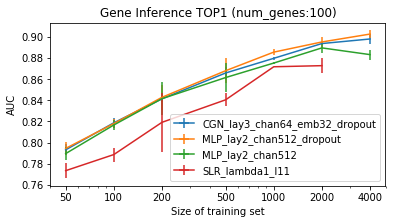

In [19]:
for plot_gene in g.split("\n"):
    import pickle
    results = pickle.load(open("results_" + plot_gene + ".pkl" , "r"))

    %matplotlib inline

    plt.rcParams['figure.figsize'] = (6, 3)
    plot_num_genes = 100

    subset = results["df"][(results["df"].num_genes==plot_num_genes) & 
                          (results["df"].gene_name==plot_gene)]

    q = subset.groupby(['model','train_size'])['auc']

    #for model in ['CGN_2_layer_512_channel_emb_512_dropout', "MLP_2_chan512", "SLR2=lambda10-l1-1"]:#
    for model in subset["model"].unique():
        index = q.mean()[model].index
        mean = q.mean()[model]
        stderr = q.std()[model]/np.sqrt(q.count()[model])
        plt.errorbar(index, mean,label=model, xerr=0, yerr=stderr)

    plt.title("Gene Inference " + plot_gene + " (num_genes:" + str(plot_num_genes) +")")
    plt.ylabel("AUC")
    plt.xlabel("Size of training set")
    plt.xscale("log")
    plt.xticks(index)
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.legend();
    plt.savefig("figs/sgi-" + plot_gene + "-" + "ngenes" + str(plot_num_genes) + ".png", bbox_inches='tight')

In [20]:
results["df"].model.unique()

array(['CGN_lay3_chan64_emb32_dropout', 'MLP_lay2_chan512_dropout',
       'MLP_lay2_chan512', 'SLR_lambda1_l11'], dtype=object)

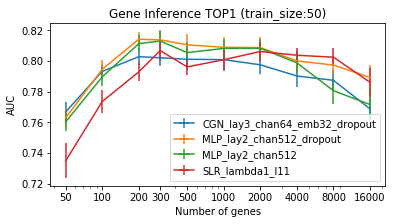

In [21]:
for plot_gene in g.split("\n"):

    import pickle
    results = pickle.load(open("results_" + plot_gene + ".pkl" , "r"))


    %matplotlib inline
    plt.rcParams['figure.figsize'] = (6, 3)
    plot_train_size = 50

    subset = results["df"][(results["df"].train_size==plot_train_size) & 
                      (results["df"].gene_name==plot_gene) & 
                      (results["df"].num_genes!=400) &      
                      (results["df"].num_genes> 0)]


    q = subset.groupby(['model','num_genes'])['auc']

    #['CGN_2_layer_512_channel_emb_512_dropout', "MLP_2_chan512", "SLR2=lambda10-l1-1"]:
    #for model in ['CGN_2_layer_512_channel_emb_512_dropout', "MLP_2_chan512", "SLR2=lambda10-l1-1"]:
    for model in subset["model"].unique():
        index = list(q.mean()[model].index)
        mean = q.mean()[model]
        stderr = q.std()[model]/np.sqrt(q.count()[model])
        plt.errorbar(index, mean,label=model, xerr=0, yerr=stderr)

    plt.title("Gene Inference " + plot_gene + " (train_size:" + str(plot_train_size) +")")
    plt.ylabel("AUC")
    plt.xlabel("Number of genes")
    plt.xscale("log")
    plt.xticks(sorted(subset["num_genes"].unique()))
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)
    #plt.xlim(40,4500)
    plt.legend();
    plt.savefig("figs/sgi-" + plot_gene + "-" + "train" + str(plot_train_size) + ".png", bbox_inches='tight')